In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [3]:
# ----- Step 1: Open file dialog to select CSV file -----
# Hide the main Tkinter window
Tk().withdraw()
filename = askopenfilename(title="Select CSV file", 
                           filetypes=[("CSV files", "*.csv"), ("All files", "*.*")])
if not filename:
    raise Exception("No file selected!")

In [5]:
# ----- Step 2: Read data from CSV -----
# Assumes that each row is a sample,
# the first n columns are independent variables,
# and the last column is the dependent variable.
data = pd.read_csv(filename)

# Specify the number of independent variables (n)
n_features = 1  # Change this value as needed

# Extract independent variables (X) and dependent variable (y)
X = data.iloc[:, :n_features].values
y = data.iloc[:, -1].values

# ----- (Optional) Standardize features for better convergence -----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# ----- Step 3: Setup Ridge Regression via SGDRegressor -----
# We use SGDRegressor with L2 penalty (ridge regression)
# and perform iterative training via partial_fit.
alpha_value = 0.1          # Regularization strength (adjust as needed)
learning_rate_value = 0.01 # Learning rate for gradient descent
epochs = 100               # Number of iterations (epochs)
m = len(y)                 # Number of samples

model = SGDRegressor(penalty='l2', 
                     alpha=alpha_value, 
                     max_iter=1,         # We'll manually iterate
                     tol=None, 
                     learning_rate='constant', 
                     eta0=learning_rate_value, 
                     warm_start=True,    # So that subsequent calls continue training
                     random_state=42)

cost_history = []  # To store cost at each epoch

# Define cost function for Ridge Regression:
# cost = (1/(2*m)) * sum((y - X*w)^2) + (alpha/2) * ||w||^2
for epoch in range(epochs):
    model.partial_fit(X_scaled, y)
    y_pred = model.predict(X_scaled)
    mse = np.sum((y - y_pred) ** 2) / (2 * m)
    # Note: model.coef_ contains the coefficients (not including the intercept)
    reg_term = (alpha_value / 2) * np.sum(model.coef_ ** 2)
    cost = mse + reg_term
    cost_history.append(cost)

# Final prediction after training
y_pred = model.predict(X_scaled)

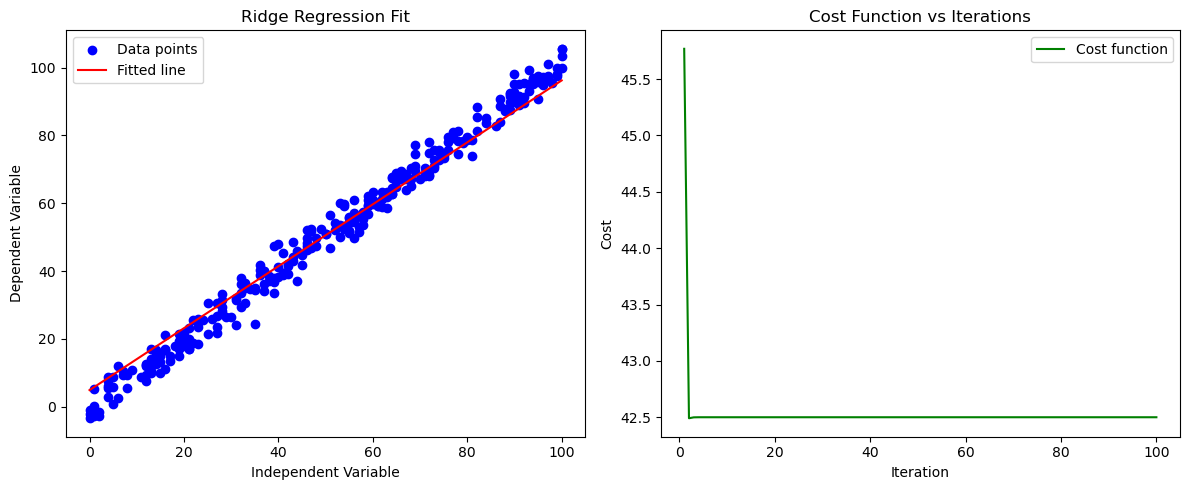

In [9]:
# ----- Step 4: Visualization -----
if n_features == 1:
    # For 1D independent variable, plot scatter and fitted line
    plt.figure(figsize=(12, 5))

    # Plot data points and fitted regression line
    plt.subplot(1, 2, 1)
    plt.scatter(X, y, color='blue', label='Data points')
    # To plot a smooth line, sort the X values
    sorted_idx = np.argsort(X.flatten())
    plt.plot(X[sorted_idx], y_pred[sorted_idx], color='red', label='Fitted line')
    plt.xlabel('Independent Variable')
    plt.ylabel('Dependent Variable')
    plt.title('Ridge Regression Fit')
    plt.legend()

    # Plot cost function vs. iterations
    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs + 1), cost_history, color='green', label='Cost function')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Cost Function vs Iterations')
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    # For multivariate X, only plot the cost function curve
    plt.figure(figsize=(6, 5))
    plt.plot(range(1, epochs + 1), cost_history, color='green', label='Cost function')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Cost Function vs Iterations')
    plt.legend()
    plt.show()
